In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import joblib
from bayes_opt import BayesianOptimization
import xgboost as xgb
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

data = pd.read_csv('..\data\PFdata4ML.csv')

X = data.iloc[:,data.columns != "pf_log"]
y = data.iloc[:,data.columns == "pf_log"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.1,random_state=1)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
scaler.fit(Xtrain)
scaler.fit(Xtest)
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

(328, 21) (37, 21) (328, 1) (37, 1)


In [2]:
error1 = []
error2 = []
error_final = []

other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [3]:
def XGB(learning_rate,n_estimators,max_depth,min_child_weight,subsample,colsample_bytree,gamma,reg_alpha,reg_lambda):
    learning_rate = round(learning_rate,2)
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_child_weight = int(min_child_weight)
    subsample = round(subsample,2)
    colsample_bytree = round(colsample_bytree,2)
    gamma = round(gamma,2)
    reg_alpha = round(reg_alpha,2)
    reg_lambda = round(reg_lambda,2)
    model = xgb.XGBRegressor(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight,seed=0,subsample=subsample,colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda)
    model.fit(X_train,Ytrain.values.ravel())
    res = model.predict(X_test)
    print("Training set score: %f" % model.score(X_train,Ytrain))
    print("Test set score: %f" % model.score(X_test,Ytest))
    train_error = model.score(X_train,Ytrain)
    test_error = model.score(X_test,Ytest)
    final_error = 0.9*train_error+0.1*test_error
    name =  './'+  str(final_error)+'_'+ str(test_error)+'_'+str(train_error)  +'xg.model'
#     joblib.dump(model, name)
    error1.append(train_error)
    error2.append(test_error)
    error_final.append(final_error)
    return test_error

In [4]:
from bayes_opt import BayesianOptimization
pbounds = { 'learning_rate':(0,0.4), 'n_estimators':(400,1200), 'max_depth': (5,15), 'min_child_weight': (5,12),'subsample': (0,1), 'colsample_bytree':(0,1), 'gamma':(0,1), 'reg_alpha': (0,3), 'reg_lambda':(0,3) }
optimizer = BayesianOptimization(f=XGB,pbounds=pbounds,random_state=2)
bo=optimizer.maximize(init_points=20,n_iter=200)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
Training set score: 0.992428
Test set score: 0.929038
| 1         | 0.929     | 0.436     | 0.02593   | 0.2199    | 9.353     | 7.943     | 664.3     | 0.6139    | 1.858     | 0.2997    |
Training set score: 0.962925
Test set score: 0.884164
| 2         | 0.8842    | 0.2668    | 0.6211    | 0.2117    | 6.346     | 8.595     | 547.6     | 2.356     | 2.562     | 0.4942    |
Training set score: 0.984925
Test set score: 0.916874
| 3         | 0.9169    | 0.8466    | 0.07965   | 0.2021    | 5.653     | 7.997     | 477.2     | 0.3815    | 1.79      | 0.226     |
Training set score: 0.965358
Test set score: 0.914601
| 4         | 0.9146    | 0.1069    | 0.2203    | 0.1399    | 9.678     | 6.412     | 912.3     | 1.449     | 1.51

Training set score: 0.956347
Test set score: 0.892777
| 30        | 0.8928    | 0.1871    | 0.9681    | 0.2866    | 8.217     | 5.713     | 465.1     | 2.65      | 0.06834   | 0.5235    |
Training set score: 0.993031
Test set score: 0.887768
| 31        | 0.8878    | 0.4352    | 0.1411    | 0.3692    | 10.73     | 8.052     | 982.8     | 0.2913    | 2.924     | 0.2789    |
Training set score: 0.934248
Test set score: 0.899987
| 32        | 0.9       | 0.2571    | 0.8983    | 0.07566   | 13.41     | 6.706     | 956.2     | 1.224     | 2.072     | 0.1946    |
Training set score: 0.976517
Test set score: 0.927674
| 33        | 0.9277    | 0.4409    | 0.6183    | 0.1975    | 9.078     | 5.111     | 741.4     | 1.654     | 2.798     | 0.6031    |
Training set score: 0.977972
Test set score: 0.942628
| 34        | 0.9426    | 0.9333    | 0.3976    | 0.3084    | 13.49     | 10.39     | 1.041e+03 | 2.795     | 2.727     | 0.5572    |
Training set score: 0.980096
Test set score: 0.898740
| 35  

Training set score: 0.982466
Test set score: 0.892298
| 60        | 0.8923    | 0.3666    | 0.9917    | 0.2872    | 12.24     | 6.032     | 953.9     | 0.1437    | 0.2662    | 0.3057    |
Training set score: 0.986921
Test set score: 0.929370
| 61        | 0.9294    | 0.9702    | 0.6939    | 0.1605    | 13.5      | 6.141     | 956.8     | 0.473     | 0.8776    | 0.6132    |
Training set score: 0.988222
Test set score: 0.936222
| 62        | 0.9362    | 0.8027    | 0.1033    | 0.0609    | 8.323     | 11.44     | 1.023e+03 | 1.581     | 2.511     | 0.8962    |
Training set score: 0.968896
Test set score: 0.926158
| 63        | 0.9262    | 0.6968    | 0.5125    | 0.09285   | 7.419     | 10.97     | 1.022e+03 | 2.891     | 2.404     | 0.7001    |
Training set score: 0.579139
Test set score: 0.592217
| 64        | 0.5922    | 0.7136    | 0.3595    | 0.009668  | 6.439     | 11.94     | 1.177e+03 | 1.361     | 1.483     | 0.07101   |
Training set score: 0.993539
Test set score: 0.943214
| 65  

Training set score: 0.992767
Test set score: 0.940375
| 90        | 0.9404    | 0.9377    | 0.01092   | 0.08327   | 8.318     | 11.21     | 1.023e+03 | 1.851     | 2.94      | 0.9276    |
Training set score: 0.971272
Test set score: 0.918081
| 91        | 0.9181    | 0.5538    | 0.1612    | 0.1207    | 12.44     | 7.849     | 833.6     | 0.3264    | 1.955     | 0.1895    |
Training set score: 0.972266
Test set score: 0.929394
| 92        | 0.9294    | 0.4057    | 0.4061    | 0.02313   | 9.374     | 9.461     | 847.1     | 1.027     | 2.22      | 0.7829    |
Training set score: 0.993441
Test set score: 0.908141
| 93        | 0.9081    | 0.5507    | 0.2686    | 0.3667    | 12.21     | 8.113     | 834.1     | 0.3273    | 1.448     | 0.7359    |
Training set score: 0.867173
Test set score: 0.850968
| 94        | 0.851     | 0.9577    | 0.7704    | 0.1193    | 9.949     | 8.863     | 934.4     | 2.572     | 0.7771    | 0.08834   |
Training set score: 0.972086
Test set score: 0.934267
| 95  

Training set score: -1.361443
Test set score: -1.031013
| 120       | -1.031    | 0.3472    | 0.5978    | 0.002086  | 13.36     | 10.6      | 1.04e+03  | 2.833     | 2.727     | 0.6313    |
Training set score: 0.990326
Test set score: 0.912174
| 121       | 0.9122    | 0.4849    | 0.1132    | 0.3276    | 5.88      | 9.995     | 659.2     | 1.705     | 0.7636    | 0.7517    |
Training set score: -0.011864
Test set score: -0.017874
| 122       | -0.01787  | 0.09487   | 0.4066    | 0.2503    | 9.417     | 6.416     | 929.4     | 2.447     | 0.6746    | 0.007666  |
Training set score: 0.975583
Test set score: 0.907039
| 123       | 0.907     | 0.2718    | 0.4695    | 0.2656    | 5.795     | 10.07     | 659.5     | 1.349     | 0.5213    | 0.4521    |
Training set score: 0.915434
Test set score: 0.879861
| 124       | 0.8799    | 0.53      | 0.04471   | 0.008399  | 9.838     | 5.148     | 1.032e+03 | 1.863     | 2.94      | 0.3112    |
Training set score: 0.781760
Test set score: 0.751404
| 

Training set score: 0.968464
Test set score: 0.921915
| 150       | 0.9219    | 0.5441    | 0.6534    | 0.1894    | 12.27     | 9.0       | 943.2     | 2.762     | 0.108     | 0.4468    |
Training set score: 0.862067
Test set score: 0.834745
| 151       | 0.8347    | 0.1352    | 0.9388    | 0.3197    | 12.77     | 9.562     | 645.9     | 2.88      | 2.839     | 0.1499    |
Training set score: 0.976258
Test set score: 0.914802
| 152       | 0.9148    | 0.1642    | 0.2971    | 0.03208   | 7.173     | 5.429     | 1.156e+03 | 0.23      | 2.679     | 0.5163    |
Training set score: 0.969586
Test set score: 0.897175
| 153       | 0.8972    | 0.2005    | 0.628     | 0.3324    | 14.32     | 7.071     | 915.8     | 2.568     | 1.064     | 0.8728    |
Training set score: 0.964757
Test set score: 0.894572
| 154       | 0.8946    | 0.223     | 0.8292    | 0.1876    | 8.491     | 8.058     | 680.6     | 2.041     | 0.12      | 0.5739    |
Training set score: 0.980977
Test set score: 0.911204
| 155 

Training set score: 0.990944
Test set score: 0.913333
| 180       | 0.9133    | 0.4795    | 0.2234    | 0.2294    | 11.74     | 7.75      | 833.6     | 0.2228    | 2.262     | 0.2775    |
Training set score: 0.958658
Test set score: 0.921725
| 181       | 0.9217    | 0.4124    | 0.847     | 0.03009   | 14.0      | 10.23     | 1.032e+03 | 2.675     | 0.03703   | 0.9213    |
Training set score: 0.949443
Test set score: 0.901090
| 182       | 0.9011    | 0.1097    | 0.9179    | 0.247     | 10.2      | 11.99     | 700.8     | 2.343     | 0.04483   | 0.8659    |
Training set score: -1.361443
Test set score: -1.031013
| 183       | -1.031    | 0.8294    | 0.4039    | 0.00273   | 12.44     | 7.794     | 849.3     | 1.074     | 2.574     | 0.8504    |
Training set score: 0.967149
Test set score: 0.916108
| 184       | 0.9161    | 0.3608    | 0.8283    | 0.2412    | 14.4      | 8.444     | 1.183e+03 | 2.649     | 0.5822    | 0.8323    |
Training set score: 0.972731
Test set score: 0.857330
| 18

Training set score: 0.976795
Test set score: 0.936956
| 210       | 0.937     | 0.9027    | 0.4393    | 0.3352    | 13.49     | 11.67     | 1.199e+03 | 2.465     | 2.441     | 0.8916    |
Training set score: 0.988580
Test set score: 0.906316
| 211       | 0.9063    | 0.3764    | 0.1781    | 0.1417    | 13.33     | 7.525     | 707.0     | 1.255     | 1.77      | 0.7292    |
Training set score: 0.974150
Test set score: 0.928078
| 212       | 0.9281    | 0.918     | 0.9918    | 0.07929   | 8.912     | 10.37     | 758.3     | 1.186     | 1.015     | 0.8927    |
Training set score: 0.639011
Test set score: 0.629783
| 213       | 0.6298    | 0.7063    | 0.9569    | 0.07155   | 13.85     | 6.133     | 457.8     | 2.085     | 2.3       | 0.03513   |
Training set score: 0.963439
Test set score: 0.905708
| 214       | 0.9057    | 0.2671    | 0.327     | 0.3167    | 13.3      | 11.7      | 438.8     | 1.212     | 0.1186    | 0.288     |
Training set score: 0.989309
Test set score: 0.921431
| 215 

In [5]:
xg = joblib.load(r'.\XG.model')

scaler.fit(Xtrain)
scaler.fit(Xtest)
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

In [6]:
# R2
Ytrain_pre = xg.predict(X_train)
print(f'Train_R2_score is {xg.score(X_train,Ytrain.values.ravel()):.2f}')

# RMSE
train_rmse = np.sqrt(mean_squared_error(Ytrain.values.ravel(),Ytrain_pre))
print(f'Train_RMSE is {train_rmse:.3f}')

# MSE
train_mse = mean_squared_error(Ytrain.values.ravel(),Ytrain_pre)
print(f'Train_MSE is {train_mse:.3f}')

# MAE
train_mae = mean_absolute_error(Ytrain.values.ravel(),Ytrain_pre)
print(f'Train_MAE is {train_mae:.3f}')

Train_R2_score is 0.99
Train_RMSE is 0.246
Train_MSE is 0.060
Train_MAE is 0.179


In [7]:
# R2
Ytest_pre = xg.predict(X_test)
print(f'Test_R2_score is {xg.score(X_test,Ytest.values.ravel()):.2f}')

# RMSE
test_rmse = np.sqrt(mean_squared_error(Ytest.values.ravel(),Ytest_pre))
print(f'Test_RMSE is {test_rmse:.3f}')

# MSE
test_mse = mean_squared_error(Ytest.values.ravel(),Ytest_pre)
print(f'Test_MSE is {test_mse:.3f}')

# MAE
test_mae = mean_absolute_error(Ytest.values.ravel(),Ytest_pre)
print(f'Test_MAE is {test_mae:.3f}')

Test_R2_score is 0.96
Test_RMSE is 0.611
Test_MSE is 0.373
Test_MAE is 0.428


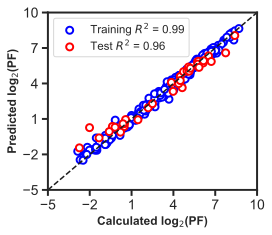

In [10]:
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(4,3.5))
sns.set_style('ticks')

fig1 = sns.scatterplot(x = Ytrain.values.ravel(),
                       y = Ytrain_pre,
                       ec="blue",
                       linewidth = 2,
                       alpha=1,
                       color = 'w',
                       marker='o',
                       s = 50,
                       )

fig2 = sns.scatterplot(x = Ytest.values.ravel(),
                       y = Ytest_pre,
                       ec="red",
                       linewidth = 2,
                       alpha=1,
                       color = 'w',
                       marker='o',
                       s = 50,
                       )

plt.legend(labels=["Training $R^2$ = 0.99","Test $R^2$ = 0.96"],loc="upper left",fontsize=11.5)  

title='Calculated log$_2$(PF)'
title1='Predicted log$_2$(PF)'
plt.xlabel(title,
          fontsize=12,
          fontweight='bold')
plt.ylabel(title1,
          fontsize=12,
          fontweight='bold')

plt.xlim((-5, 10))
plt.ylim((-5, 10))
plt.plot([-5, 10],[-5, 10], color='k', linewidth=1.5, linestyle='--')

my_x_ticks = np.arange(-5, 10.1,3)
my_y_ticks = np.arange(-5, 10.1,3)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=2)
bwith = 2 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)

plt.tight_layout()
plt.show()